In [8]:
import pandas as pd
import os

In [4]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

In [39]:
files = [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.to_csv("all_data.csv")

### Augmenting Data with more columns {date}

In [44]:
all_data = pd.read_csv("all_data.csv")
all_data.head(500)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...,...
495,495,296135,Lightning Charging Cable,1,14.95,12/06/19 19:18,"298 Lincoln St, Boston, MA 02215"
496,496,296136,USB-C Charging Cable,1,11.95,12/11/19 04:19,"867 Church St, New York City, NY 10001"
497,497,296137,Wired Headphones,1,11.99,12/23/19 13:31,"502 Forest St, Dallas, TX 75001"
498,498,296138,34in Ultrawide Monitor,1,379.99,12/19/19 13:19,"235 Adams St, San Francisco, CA 94016"


### Adding a Month column to our data

In [67]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Changing Month type from string to int

#### Removing 'Or' from the data set.

In [77]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float').astype('int32')



#### Filtering data set by removing Nan characters

In [71]:
all_data = all_data.dropna()

In [72]:
all_data['Month'] = all_data['Month'].astype('int32')

### Q1: What was the month of sales and what was the profit for it?

In [78]:
all_data['Profit'] = all_data['Quantity Ordered'] *  all_data['Price Each']

In [84]:
all_data[all_data['Profit'] == all_data['Profit'].max()]

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Profit
29834,4717,181069,Macbook Pro Laptop,2,1700,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",4,3400
30336,5219,181544,Macbook Pro Laptop,2,1700,04/22/19 12:48,"731 11th St, New York City, NY 10001",4,3400
89549,6776,200528,Macbook Pro Laptop,2,1700,05/13/19 13:40,"643 4th St, Boston, MA 02215",5,3400
173613,385,210292,Macbook Pro Laptop,2,1700,06/08/19 09:00,"953 Ridge St, San Francisco, CA 94016",6,3400


### Summing up values to know the best month for sales and the profit


In [86]:
result = all_data.groupby('Month').sum()

### Visualising the data

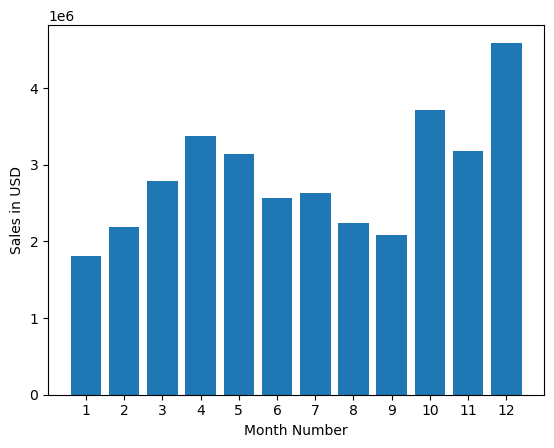

In [92]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, result['Profit'] )
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month Number')
plt.show()

### Q2: What city had the highest number of sales

#### Task is to extract cities form purchase address

In [102]:
# Using .apply() we can create a cell value for lambda x:

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

all_data.head()




,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Profit,City
0,0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700,New York City
1,1,295666,LG Washing Machine,1,600,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600,New York City
2,2,295667,USB-C Charging Cable,1,11,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11,New York City
3,3,295668,27in FHD Monitor,1,149,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149,San Francisco
4,4,295669,USB-C Charging Cable,1,11,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11,Atlanta


In [104]:
result = all_data.groupby('City').sum()
result

,Unnamed: 0,Quantity Ordered,Price Each,Month,Profit
City,,,,,
Atlanta,122928154,16602,2768857,104794,2782841
Austin,82709457,11153,1802516,69829,1811054
Boston,165758780,22528,3622510,141112,3644327
Dallas,124308328,16730,2741555,104620,2755117
Los Angeles,247743297,33289,5399261,208325,5426973
New York City,208439450,27932,4616764,175741,4642872
Portland,104043698,14053,2298450,87765,2309717
San Francisco,372569180,50239,8178055,315520,8223669
Seattle,122394893,16553,2722310,104941,2735070


### Plotting the figures for best sales city

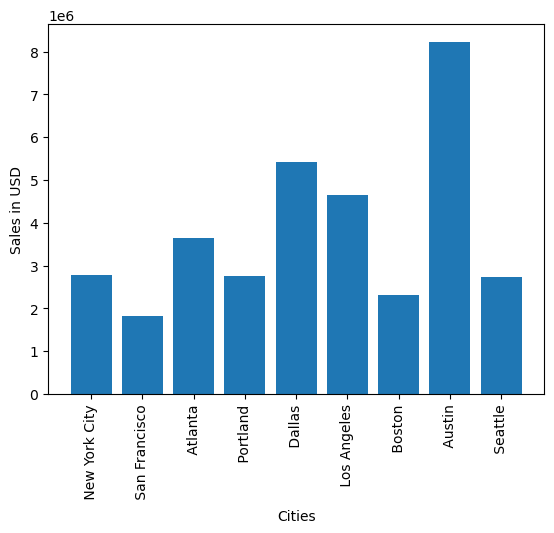

In [111]:
import matplotlib.pyplot as plt
city = all_data['City'].unique()
plt.bar(city, result['Profit'] )
plt.xticks(city, rotation = 'vertical', size = 10)
plt.ylabel('Sales in USD')
plt.xlabel('Cities')
plt.show()

### Q3: Time to display advertisment to maximise buying if products

#### Coverting date time string into particular date time 

In [116]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head(200)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Profit,City
0,0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700,New York City
1,1,295666,LG Washing Machine,1,600,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600,New York City
2,2,295667,USB-C Charging Cable,1,11,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11,New York City
3,3,295668,27in FHD Monitor,1,149,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149,San Francisco
4,4,295669,USB-C Charging Cable,1,11,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11,Atlanta
...,...,...,...,...,...,...,...,...,...,...
195,195,295843,Bose SoundSport Headphones,1,99,2019-12-19 14:02:00,"700 West St, San Francisco, CA 94016",12,99,San Francisco
196,196,295844,AA Batteries (4-pack),1,3,2019-12-31 17:51:00,"663 12th St, Atlanta, GA 30301",12,3,Atlanta
197,197,295845,Lightning Charging Cable,1,14,2019-12-20 09:53:00,"955 Sunset St, San Francisco, CA 94016",12,14,San Francisco
198,198,295846,Flatscreen TV,1,300,2019-12-27 19:22:00,"453 Johnson St, Atlanta, GA 30301",12,300,Atlanta


#### Adding a new column to our dataset for a clear representation of Date and Time.

In [ ]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.groupby(['Hour']).count()


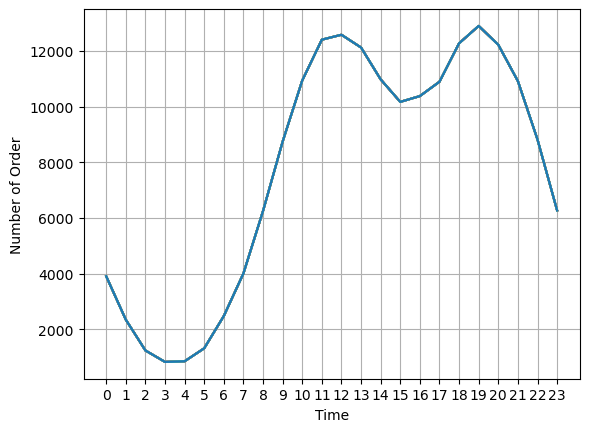

In [134]:

hours = [hour for hour, df in all_data.groupby('Hour')] 
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.ylabel('Number of Order')
plt.xlabel('Time')
plt.grid()
plt.show()


# My recommendation is around 11am and 7pm(19:00 Hours) 

### Q4: What products are often sold together

In [139]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()  ##to drop duplicates having same order ID
df.head()
 

/var/folders/0g/wvq8mj1j33g361p822hz_tv00000gn/T/ipykernel_36312/3840658612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [141]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
# print(count) shows all pairs

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### Q5: What products sold the most? Why do you think it sold the most?

([<matplotlib.axis.XTick at 0x7f87854700a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

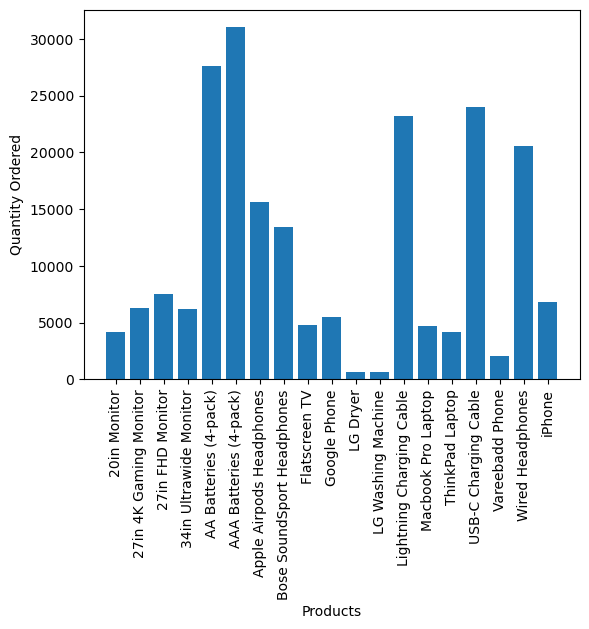

In [154]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(products, rotation = 'vertical', size = 10)


/var/folders/0g/wvq8mj1j33g361p822hz_tv00000gn/T/ipykernel_36312/3236819451.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8)


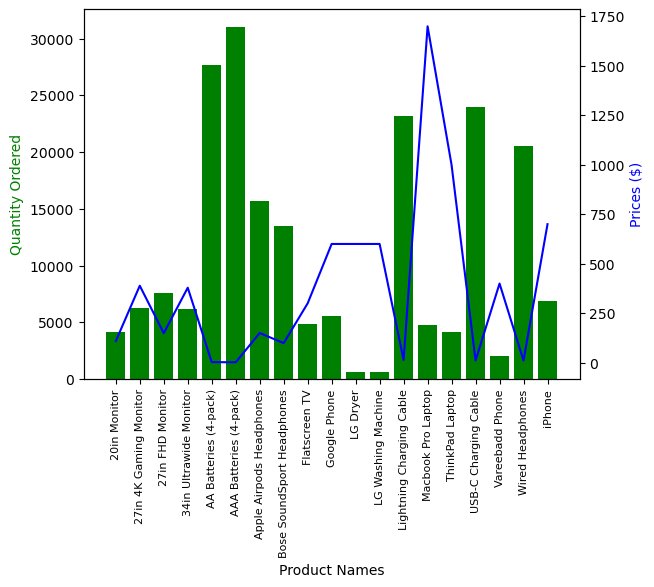

In [169]:
prices = all_data.groupby('Product').mean()['Price Each']


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'green')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Names')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices ($)', color='b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()